## Data Wrangling

In this notebook we
1. Load [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle) from Kaggle.
2. Load data for other cities, including Asheville, Austin, Boston, etc, from [Inside Airbnb].(http://insideairbnb.com/get-the-data.html)
3. Clean data by removing unwanted columns, drop duplicates(if applicable), going through all the columns to fix data types, fixing missing values, finding outliers and fixing them.

## Import Packages

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
# palette = sns.cubehelix_palette(15)
# palette = sns.light_palette((210, 90, 60), input="husl")
palette = sns.diverging_palette(220, 20, sep=20, n = 150)
# palette = sns.color_palette("Blues_d", n_colors = 150)
# palette = sns.color_palette(['#f7fcf0','#e0f3db','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081'])
# palette = sns.color_palette("GnBu_r", n_colors = 100)
sns.set_palette(palette)

## Load Data

In [2]:
# Check how many csv files there are
data_dir = '../data/*.csv'
! ls {data_dir}

../data/Copenhagen.csv   ../data/SanFrancisco.csv
../data/HongKong.csv     ../data/Seattle.csv


In [3]:
# There are 3 mode for loading data set
# one, two & all
csv_dict = {'one': '../data/Seattle.csv',
            'two': '../data/S*.csv',
            'all': '../data/*.csv'}

load_data_mode = 'two'

In [4]:
# Define function for loading data, there's one argument 'load_data_mode'
# to determine how many cities of data to be loaded.
def load_data(csv_pat):
    filenames = glob(csv_pat)
    dfs = [pd.read_csv(f, low_memory = False) for f in filenames]
    df = pd.concat(dfs)
    return df

In [5]:
# Load data for each city and concat them
df = load_data(csv_dict[load_data_mode])

In [6]:
# Display all columns to check which data we might need visually
pd.set_option('display.max_columns', len(df.columns))
df.head(2)

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1,106,6,8,1.0,Real Bed,1.0,2.0,1,2018-03-03,yesterday,moderate,San Francisco,$100.00,United States,US,Our bright garden unit overlooks a grassy back...,none,$25.00,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,NaN,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/efdad96a-3...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/efdad96a-3...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,f,A family of 4 lives upstairs with their dog. N...,f,t,"{""SAN FRANCISCO""}",2018-02-26,2018-03-04,37.769310,STR-0001256,https://www.airbnb.com/rooms/958,-122.433856,San Francisco,30,NaN,1,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Duboce Triangle,Western Addition,NaN,Due to the fact that we have children and a do...,127,https://a0.muscache.com/im/pictures/51332160/0...,$170.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.21,Entire home/apt,20180303203625,$100.00,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",Our bright garden unit overlooks a grassy back...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
1,"Our deck, garden, gourmet kitchen and extensiv...",5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",30,365,60,90,1.0,Real Bed,2.0,3.0,1,2018-03-04,7 weeks ago,strict,San Francisco,$100.00,United States,US,We live in a large Victorian house on a quiet ...,none,$0.00,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,NaN,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,80%,within a few hours,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Please respect the house, the art work, the fu...",5858,f,NaN,f,t,"{""SAN FRANCISCO""}",2017-08-06,2018-03-04,37.745112,NaN,https://www.airbnb.com/rooms/5858,-122.421018,San Francisco,60,NaN,30,"$5,500.00",Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,Bernal Heights,NaN,All the furniture in the house was handmade so...,112,https://a0.muscache.com/im/pictures/17714/3a7a...,$235.

## Seleceted Columns that might be useful

In [7]:
# Select features that might be useful
# drop more columns
selected_features = ['picture_url', 'host_since', 'last_scraped',
                     'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                     'host_picture_url', 'host_listings_count', 'host_total_listings_count',
                     'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                     'neighbourhood', 'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
                     'country_code', 'latitude', 'longitude',
                     'is_location_exact', 'property_type', 'room_type', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
                     'guests_included', 'extra_people', 'minimum_nights', 'calendar_updated',
                     'has_availability',
                     'number_of_reviews', 'first_review', 'last_review',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value', 'instant_bookable',
                     'cancellation_policy', 'require_guest_profile_picture',
                     'require_guest_phone_verification', 'calculated_host_listings_count',
                     'reviews_per_month', 'cleaning_fee', 'price']

In [8]:
# Define function to drop more unnecessary columns if there's only data from one city.
def drop_city_related_cols(cols):
    city_related_cols = ['city', 'state', 'market', 'country_code']
    
    for col in city_related_cols:
        cols.remove(col)

In [9]:
if load_data_mode == 'one':
    drop_city_related_cols(selected_features)
    
df_selected_cols = df[selected_features]
df_selected_cols.head(2)

,picture_url,host_since,last_scraped,host_response_time,host_response_rate,host_acceptance_rate,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleaning_fee,price
0,https://a0.muscache.com/im/pictures/51332160/0...,2008-07-31,2018-03-04,within an hour,100%,NaN,https://a0.muscache.com/im/pictures/efdad96a-3...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Duboce Triangle,Western Addition,NaN,San Francisco,CA,94117,San Francisco,US,37.769310,-122.433856,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,2,$25.00,1,yesterday,t,127,2009-07-23,2018-02-26,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.21,$100.00,$170.00
1,https://a0.muscache.com/im/pictures/17714/3a7a...,2009-03-02,2018-03-04,within a few hours,80%,NaN,https://a0.muscache.com/im/users/8904/profile_...,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Bernal Heights,Bernal Heights,NaN,San Francisco,CA,94110,San Francisco,US,37.745112,-122.421018,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",NaN,2,$0.00,30,7 weeks ago,t,112,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,f,strict,f,f,1,1.04,$100.00,$235.00


In [10]:
# Inspect by info()
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 3817
Data columns (total 55 columns):
picture_url                         8622 non-null object
host_since                          8592 non-null object
last_scraped                        8622 non-null object
host_response_time                  7705 non-null object
host_response_rate                  7705 non-null object
host_acceptance_rate                3045 non-null object
host_picture_url                    8592 non-null object
host_listings_count                 8592 non-null float64
host_total_listings_count           8592 non-null float64
host_verifications                  8622 non-null object
host_has_profile_pic                8592 non-null object
host_identity_verified              8592 non-null object
neighbourhood                       8206 non-null object
neighbourhood_cleansed              8622 non-null object
neighbourhood_group_cleansed        3818 non-null object
city                                

## Drop Duplicates & Unwanted Columns

In [11]:
# Drop duplicate data
df_selected_cols = df_selected_cols.drop_duplicates()

In [12]:
# Drop unnecessary columns
# Drop square_feet since too less data is available
# Drop neighbourhood since it's covered by neighbourhood_cleansed
df_selected_cols = df_selected_cols.drop(['square_feet', 'neighbourhood'], axis=1)

##  Fix Data Types

In [13]:
# There are many 'object' data, which means there are mixed data types, start to clean up
obj_mask = df_selected_cols.dtypes == 'object'
sum(obj_mask)
# There are total 37 columns w/ object type

33

In [14]:
# define function to report how many columns have been cleaned
total_cleaned = 0
def report_cleaned_columns(num_cleaned):
    global total_cleaned
    total_cleaned += num_cleaned
    print('total # cleaned columns:', total_cleaned)

In [15]:
# Combining latitude & longitude using binning
step = 0.1
to_bin = lambda x: np.floor(x / step) * step
df_selected_cols['latitude_bin'] = df_selected_cols['latitude'].map(to_bin)
df_selected_cols['longitude_bin'] = df_selected_cols['longitude'].map(to_bin)
df_selected_cols = df_selected_cols.drop(['latitude', 'longitude'], axis=1)

In [16]:
grps = df_selected_cols.groupby(('latitude_bin', 'longitude_bin'))

bin_dict = {}
for i, key in enumerate(grps.groups.keys()):
    bin_dict[key] = i

df_selected_cols['latitude_longitude_bin'] = df_selected_cols.apply(lambda x: bin_dict[(x['latitude_bin'], x['longitude_bin'])], axis = 1)
df_selected_cols = df_selected_cols.drop(['latitude_bin', 'longitude_bin'], axis=1)

In [17]:
# Parse data which should be categorical data and use sklearn LabelEncoder to encode them
# save the label encoder in case we want to inverse later
le_dict = {}

# Parse data which should be categorical data
columns_categorical = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                       'city', 'state', 'zipcode', 'market', 'country_code', 'latitude_longitude_bin',
                       'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'calendar_updated']

if load_data_mode == 'one':
    drop_city_related_cols(columns_categorical)

for col in columns_categorical:
    le = preprocessing.LabelEncoder()
    df_selected_cols[col] = df_selected_cols[col].astype(str)
    le.fit(df_selected_cols[col])
    df_selected_cols[col] = le.transform(df_selected_cols[col]) 
    le_dict[col] = le 
    
report_cleaned_columns(len(columns_categorical))

total # cleaned columns: 14


In [18]:
# Parse data whose values are true / false
columns_are_t_f = ['host_has_profile_pic', 'host_identity_verified',
                   'is_location_exact', 'has_availability', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']

t_f_dict = {'t': True, 'f': False}
for col in columns_are_t_f:
    df_selected_cols[col] = df_selected_cols[col].map(t_f_dict).astype('bool')

report_cleaned_columns(len(columns_are_t_f))

total # cleaned columns: 21


In [19]:
# Parse datas into datetime objs & tranform them to numeric numbers
columns_are_dates = ['last_scraped', 'host_since', 'first_review', 'last_review']

for col in columns_are_dates:
    df_selected_cols[col] = pd.to_datetime(df_selected_cols[col])
    
columns_are_dates_to_be_transformed = ['host_since', 'first_review', 'last_review']
for col in columns_are_dates_to_be_transformed:
    df_selected_cols[col + '_delta'] = (df_selected_cols['last_scraped'] - df_selected_cols[col]) / np.timedelta64(1, 'D')
    df_selected_cols = df_selected_cols.drop(col, axis=1)

df_selected_cols = df_selected_cols.drop(['last_scraped'], axis=1)
report_cleaned_columns(len(columns_are_dates))

total # cleaned columns: 25


In [20]:
# Replace columns w/ '$' to float
columns_with_dollar_sign = ['extra_people', 'cleaning_fee', 'price']

for col in columns_with_dollar_sign:
    df_selected_cols[col] = df_selected_cols[col].astype(str).str.replace('$', '').str.replace(',', '')
    df_selected_cols[col] = pd.to_numeric(df_selected_cols[col], errors='coerce')
    
report_cleaned_columns(len(columns_with_dollar_sign))

total # cleaned columns: 28


In [21]:
# Replace columns w/ '%' to float
columns_with_percent_sign = ['host_response_rate', 'host_acceptance_rate']
for col in columns_with_percent_sign:
    df_selected_cols[col] = df_selected_cols[col].astype(str).str.replace('%', '').replace(',', '')
    df_selected_cols[col] = pd.to_numeric(df_selected_cols[col], errors='coerce')

report_cleaned_columns(len(columns_with_percent_sign))

total # cleaned columns: 30


In [22]:
# Replace host_verifications with boolean
df_selected_cols['has_' + 'host_verifications'] = df_selected_cols['host_verifications'].notnull()
df_selected_cols = df_selected_cols.drop(['host_verifications'], axis=1)

report_cleaned_columns(1)

total # cleaned columns: 31


In [23]:
# Replace urls with Boolean, e.g., has url or not
columns_are_urls = ['picture_url', 'host_picture_url']

for col in columns_are_urls:
    df_selected_cols['has_' + col] = df_selected_cols[col].map(lambda column: isinstance(col, str) and 'https:' in col)
    df_selected_cols = df_selected_cols.drop([col], axis=1)

report_cleaned_columns(len(columns_are_urls))

total # cleaned columns: 33


In [24]:
# Not sure how to clean amenities, drop for now.
# Will bring it back later if needed
df_selected_cols = df_selected_cols.drop(['amenities'], axis=1)

In [25]:
# Verify by info again
# There are total 38 object data in the beginning and we've cleaned/transformed 36 & dropped 2
# All selected columns are w/ proper data type now
# Also memory usage has dropped from 1.9MB to 1.5MB
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 3817
Data columns (total 50 columns):
host_response_time                  8622 non-null int64
host_response_rate                  7705 non-null float64
host_acceptance_rate                3045 non-null float64
host_listings_count                 8592 non-null float64
host_total_listings_count           8592 non-null float64
host_has_profile_pic                8622 non-null bool
host_identity_verified              8622 non-null bool
neighbourhood_cleansed              8622 non-null int64
neighbourhood_group_cleansed        8622 non-null int64
city                                8622 non-null int64
state                               8622 non-null int64
zipcode                             8622 non-null int64
market                              8622 non-null int64
country_code                        8622 non-null int64
is_location_exact                   8622 non-null bool
property_type                       8622 non-nul

In [26]:
# Visually inspect data to double check
df_selected_cols.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleaning_fee,price,latitude_longitude_bin,host_since_delta,first_review_delta,last_review_delta,has_host_verifications,has_picture_url,has_host_picture_url
0,4,100.0,NaN,1.0,1.0,True,True,118,17,5,0,16,0,1,True,1,0,3,1.0,1.0,2.0,4,2,25.0,1,42,True,127,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1,False,False,1,1.21,100.0,170.0,1,3503.0,3146.0,6.0,True,False,False
1,3,80.0,NaN,2.0,2.0,True,True,6,17,5,0,10,0,1,True,1,0,5,1.0,2.0,3.0,4,2,0.0,30,36,True,112,98.0,10.0,10.0,10.0,10.0,10.0,9.0,False,2,False,False,1,1.04,100.0,235.0,1,3289.0,3227.0,210.0,True,False,False


## Fix Missing Values

In [27]:
# Many review-related data have missing values & looks like when one of them is missng, the rest are also missing
# Add another feature 'has_review' which is True when all the review-related data are present
review_related_columns = ['first_review_delta', 'last_review_delta',
                          'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                          'review_scores_value', 'reviews_per_month']

df_selected_cols['has_review'] = True
for col in review_related_columns:
    df_selected_cols['has_review'] = df_selected_cols['has_review'] & df_selected_cols[col].notnull()
for col in review_related_columns:
    df_selected_cols = df_selected_cols.drop(col, axis=1)

In [28]:
# define function for plotting subplots
def get_sub_plots(n_total_columns, n_cols):
    n_rows = int(n_total_columns / n_cols)
    if n_total_columns % n_cols != 0:
        n_rows += 1
        
    figsize = (10 * n_cols, 10 * n_rows)
        
    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             figsize = figsize,
                             squeeze = False)
    
    if n_total_columns % n_cols != 0:
        for col in range(n_total_columns % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()        

    return (fig, axes)

In [29]:
# define function for plotting scatter plot in each subplot
def plot_scatter_in_sub_plot(df_x, df_y, n_cols = 3, label_font_size = 28, tick_font_size = 25):
    n_total_columns = len(df_x.columns)
    fig, axes = get_sub_plots(n_total_columns, n_cols)
    
    for i, col in enumerate(df_x):
        sns.regplot(x = df_x[col], y = df_y, ax=axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

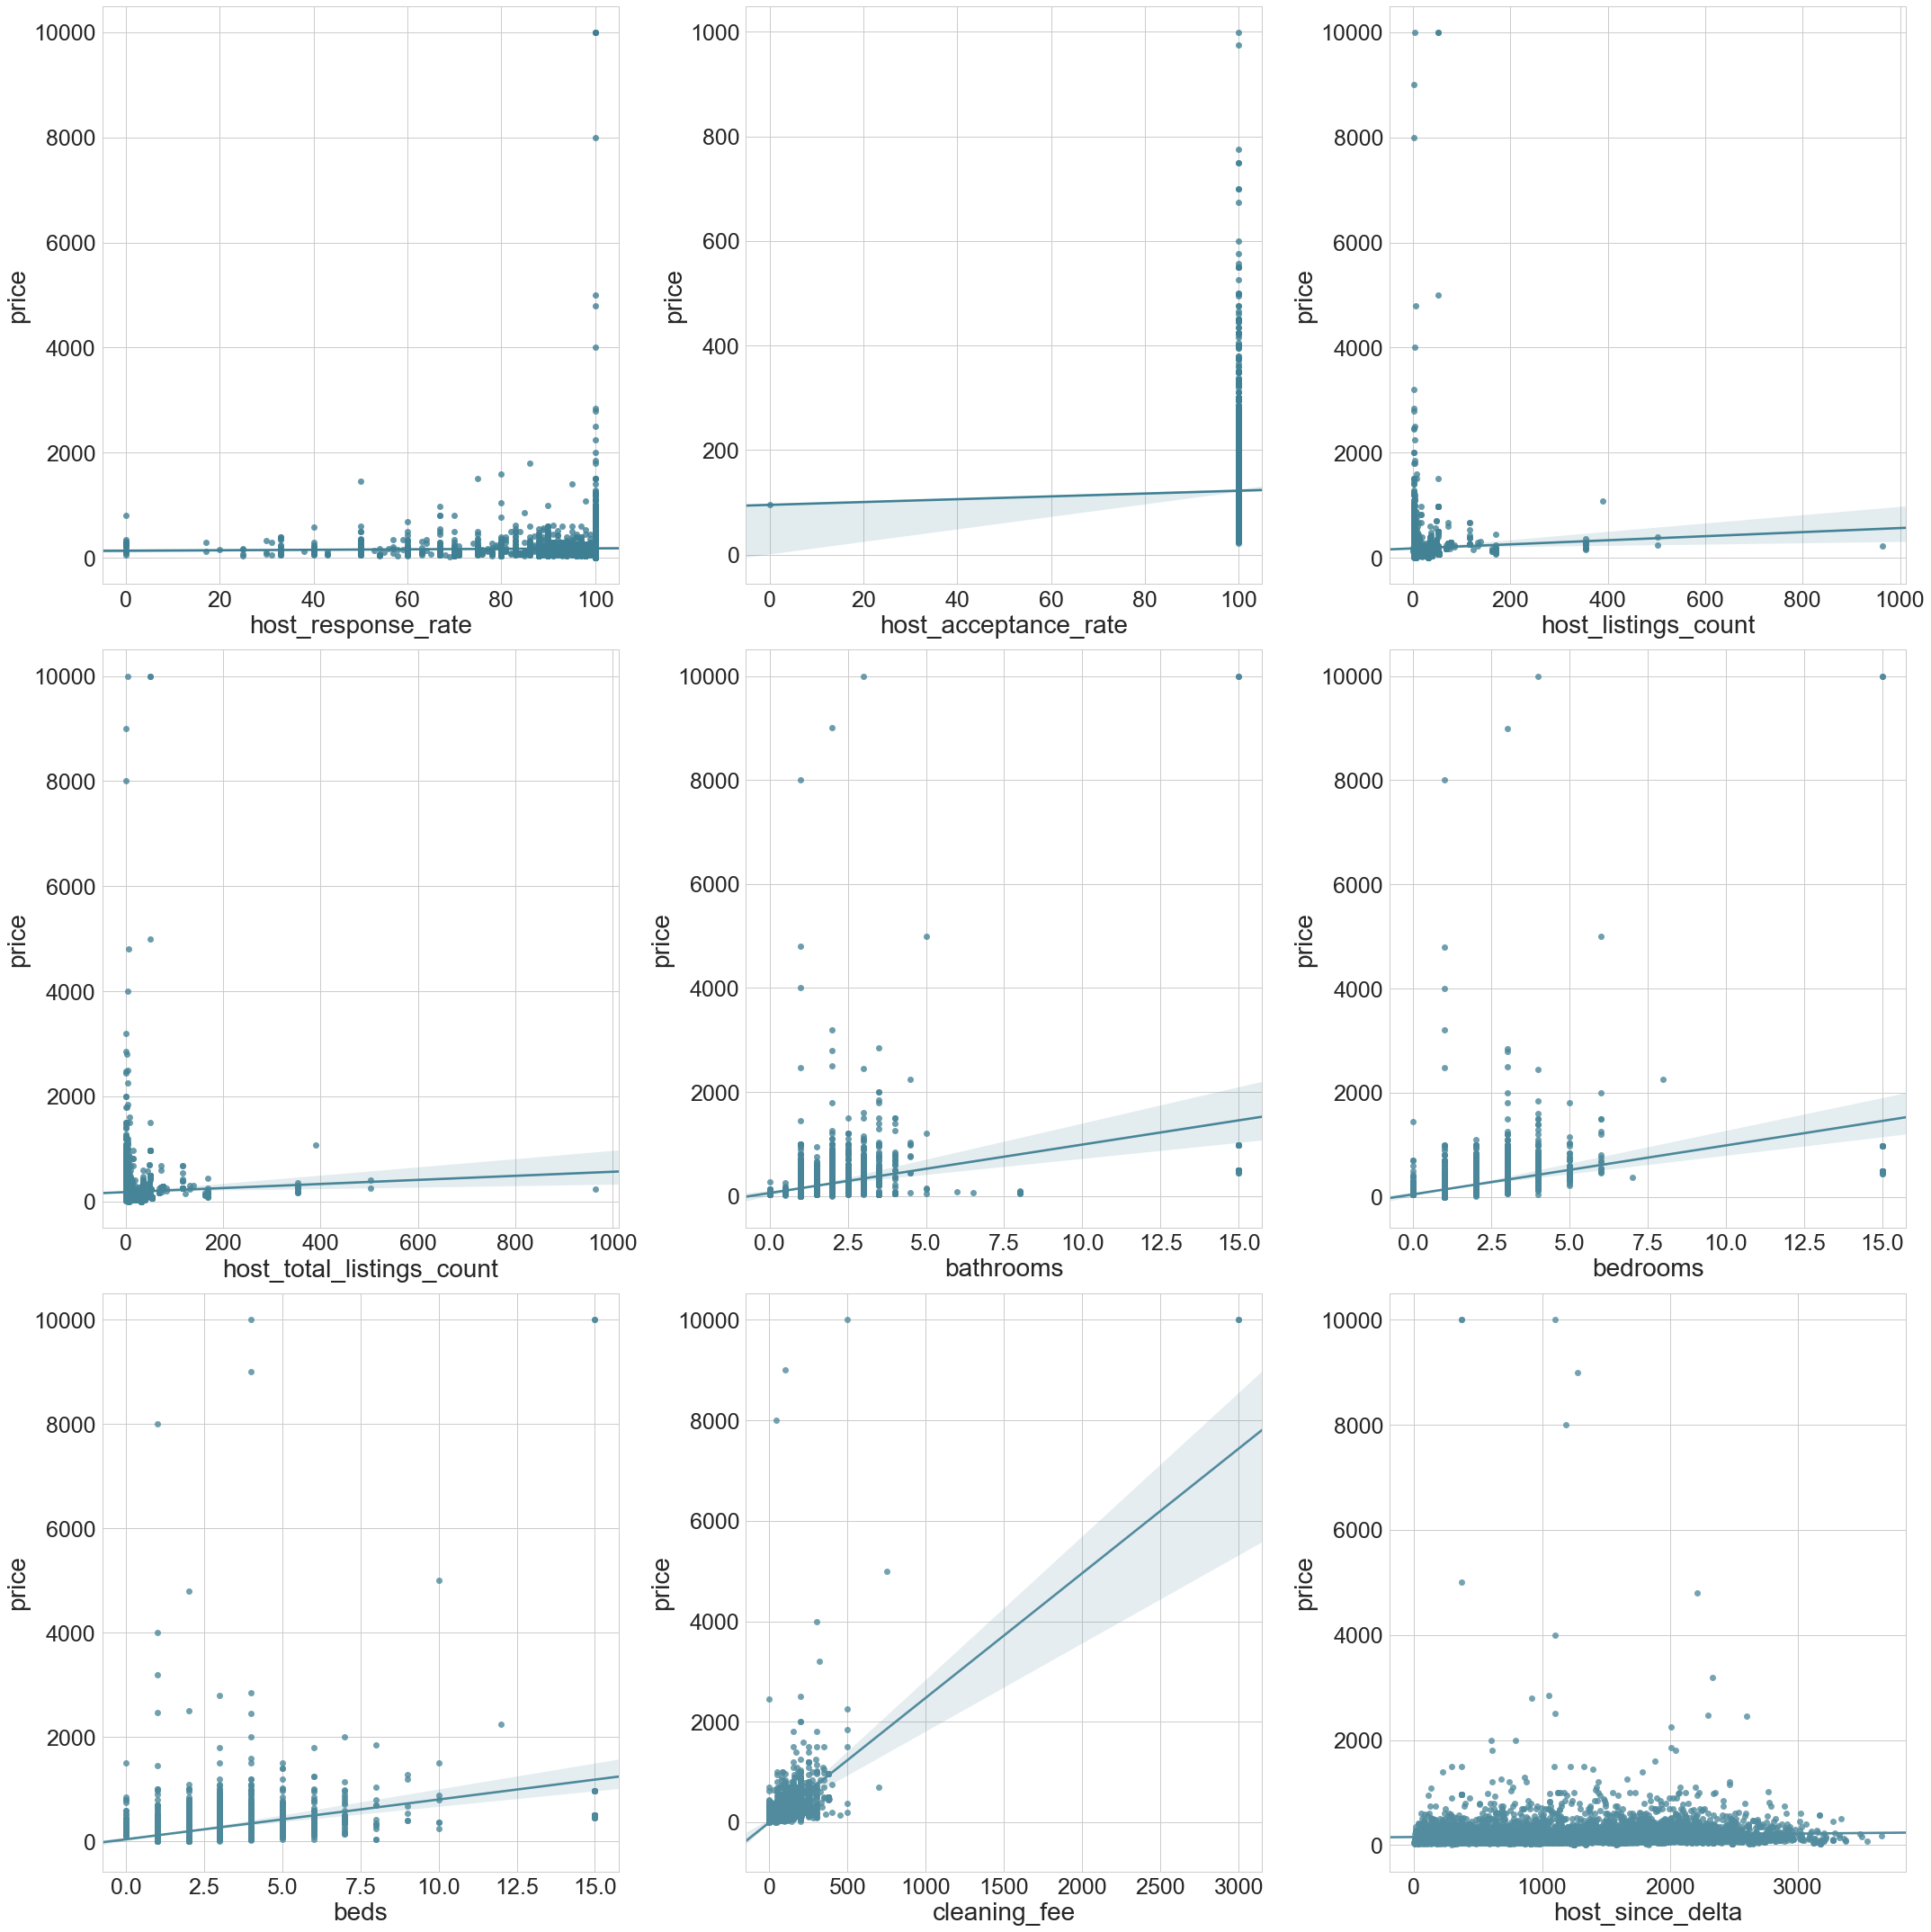

In [30]:
# Plot scatter plot for the rest columns who have missing values.
cols_w_nan = df_selected_cols.columns[df_selected_cols.isnull().any()].tolist()

plot_scatter_in_sub_plot(df_selected_cols[cols_w_nan], df_selected_cols['price'], n_cols = 3)

In [31]:
# Looks like these features are either linear or random to price
# Fix them w/ mean values
for col in cols_w_nan:
    df_selected_cols[col] = df_selected_cols[col].fillna(df_selected_cols[col].mean())

In [32]:
# Make sure all missing values are fixed except reviews
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 3817
Data columns (total 41 columns):
host_response_time                  8622 non-null int64
host_response_rate                  8622 non-null float64
host_acceptance_rate                8622 non-null float64
host_listings_count                 8622 non-null float64
host_total_listings_count           8622 non-null float64
host_has_profile_pic                8622 non-null bool
host_identity_verified              8622 non-null bool
neighbourhood_cleansed              8622 non-null int64
neighbourhood_group_cleansed        8622 non-null int64
city                                8622 non-null int64
state                               8622 non-null int64
zipcode                             8622 non-null int64
market                              8622 non-null int64
country_code                        8622 non-null int64
is_location_exact                   8622 non-null bool
property_type                       8622 non-nul

## Fix Outliers

Inspect by describe first.

In [33]:
# Use describe to check if there's any outlier
df_selected_cols.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,number_of_reviews,cancellation_policy,calculated_host_listings_count,cleaning_fee,price,latitude_longitude_bin,host_since_delta
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8.622000e+03,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,3.199374,96.241012,99.967159,6.561453,6.561453,57.097077,12.785317,5.440501,0.443517,24.961842,0.449316,0.999884,10.190095,0.409418,3.393760,1.325993,1.391481,1.826582,3.942009,1.767803,15.283925,1.160371e+04,28.973440,37.651357,1.193923,3.403503,76.923682,180.596033,4.833565,1195.550047
std,1.065442,10.166606,1.076837,24.429321,24.429321,36.583873,5.702557,0.543756,0.497994,14.179171,0.510117,0.010770,8.490061,0.539449,2.133906,1.022305,1.216527,1.409815,0.381847,1.383245,25.345837,1.076951e+06,11.402868,58.447178,0.779758,7.207186,71.718952,290.412272,4.200769,755.262884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,96.241012,99.967159,1.000000,1.000000,21.000000,10.000000,5.000000,0.000000,13.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000e+00,21.000000,3.000000,1.000000,1.000000,40.000000,87.000000,1.000000,560.000000
50%,4.000000,100.000000,99.967159,1.000000,1.000000,63.000000,17.000000,5.000000,0.000000,24.000000,0.000000,1.000000,12.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,2.000000e+00,29.000000,15.000000,1.000000,1.000000,75.000000,126.000000,2.000000,1135.000000
75%,4.000000,100.000000,100.000000,3.000000,3.000000,83.000000,17.000000,6.000000,1.000000,37.000000,1.000000,1.000000,18.000000,1.000000,4.000000,1.500000,2.000000,2.000000,4.000000,2.000000,25.000000,3.000000e+00,41.000000,45.000000,2.000000,2.000000,95.000000,200.000000,10.000000,1746.500000
max,4.000000,100.000000,100.000000,964.000000,964.000000,122.000000,17.000000,12.000000,3.000000,57.000000,3.000000,1.000000,31.000000,2.000000,16.000000,15.000000,15.000000,15.000000,4.000000,16.000000,300.000000,1.000000e+08,42.000000,568.000000,4.000000,53.000000,3000.000000,10000.000000,11.000000,3653.000000


In [34]:
# minimum_nights 1.0e+08 seems unreasonable
minimum_nights_995_percent = df_selected_cols['minimum_nights'].quantile(0.995)

In [35]:
# Cap minimum_nights to be the 99.5 percentile number of data
df_selected_cols['minimum_nights'] = df_selected_cols['minimum_nights'].map(lambda x: min(x, minimum_nights_995_percent))

In [36]:
# Call describe again & make sure everything else is fine.
df_selected_cols.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,number_of_reviews,cancellation_policy,calculated_host_listings_count,cleaning_fee,price,latitude_longitude_bin,host_since_delta
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,3.199374,96.241012,99.967159,6.561453,6.561453,57.097077,12.785317,5.440501,0.443517,24.961842,0.449316,0.999884,10.190095,0.409418,3.393760,1.325993,1.391481,1.826582,3.942009,1.767803,15.283925,4.693967,28.973440,37.651357,1.193923,3.403503,76.923682,180.596033,4.833565,1195.550047
std,1.065442,10.166606,1.076837,24.429321,24.429321,36.583873,5.702557,0.543756,0.497994,14.179171,0.510117,0.010770,8.490061,0.539449,2.133906,1.022305,1.216527,1.409815,0.381847,1.383245,25.345837,8.134850,11.402868,58.447178,0.779758,7.207186,71.718952,290.412272,4.200769,755.262884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,96.241012,99.967159,1.000000,1.000000,21.000000,10.000000,5.000000,0.000000,13.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,21.000000,3.000000,1.000000,1.000000,40.000000,87.000000,1.000000,560.000000
50%,4.000000,100.000000,99.967159,1.000000,1.000000,63.000000,17.000000,5.000000,0.000000,24.000000,0.000000,1.000000,12.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,2.000000,29.000000,15.000000,1.000000,1.000000,75.000000,126.000000,2.000000,1135.000000
75%,4.000000,100.000000,100.000000,3.000000,3.000000,83.000000,17.000000,6.000000,1.000000,37.000000,1.000000,1.000000,18.000000,1.000000,4.000000,1.500000,2.000000,2.000000,4.000000,2.000000,25.000000,3.000000,41.000000,45.000000,2.000000,2.000000,95.000000,200.000000,10.000000,1746.500000
max,4.000000,100.000000,100.000000,964.000000,964.000000,122.000000,17.000000,12.000000,3.000000,57.000000,3.000000,1.000000,31.000000,2.000000,16.000000,15.000000,15.000000,15.000000,4.000000,16.000000,300.000000,31.895000,42.000000,568.000000,4.000000,53.000000,3000.000000,10000.000000,11.000000,3653.000000


Plot for each columns and check if there are outliers.

In [37]:
len(df_selected_cols.columns)

41

In [38]:
total_fixed = 0
def report_fixed_columns(num_cleaned):
    global total_fixed
    total_fixed += num_cleaned
    print('total # fixed columns:', total_fixed)

report_fixed_columns(0)

total # fixed columns: 0


In [39]:
# define functions for plotting box and dist plots together
def plot_box_and_dist_plot(df_col, axes):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})
    sns.boxplot(df_col, ax = ax_box)
    sns.distplot(df_col, ax = ax_hist)
    ax_box.set(xlabel='')
    plt.show()

In [40]:
# define function for plotting boxplot plot in each subplot
def plot_boxplot_in_sub_plot(df_x, n_cols = 3, label_font_size = 28, tick_font_size = 25):
    n_total_columns = len(df_x.columns)
    fig, axes = get_sub_plots(n_total_columns, n_cols)
    
    for i, col in enumerate(df_x):
        sns.boxplot(df_x[col], orient = 'v', ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_ylabel(), fontsize = label_font_size)
        axes[i].set_ylabel('values', fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

In [41]:
# Plot box plot for columns except boolean data and category data.
# Update columns_categorical first
for col in columns_categorical:
    if col not in df_selected_cols.columns:
        print(col)
        columns_categorical.remove(col)

cols = df_selected_cols.select_dtypes(exclude=[bool]).columns.values.tolist()
for col in cols:
    if col in columns_categorical:
        cols.remove(col)

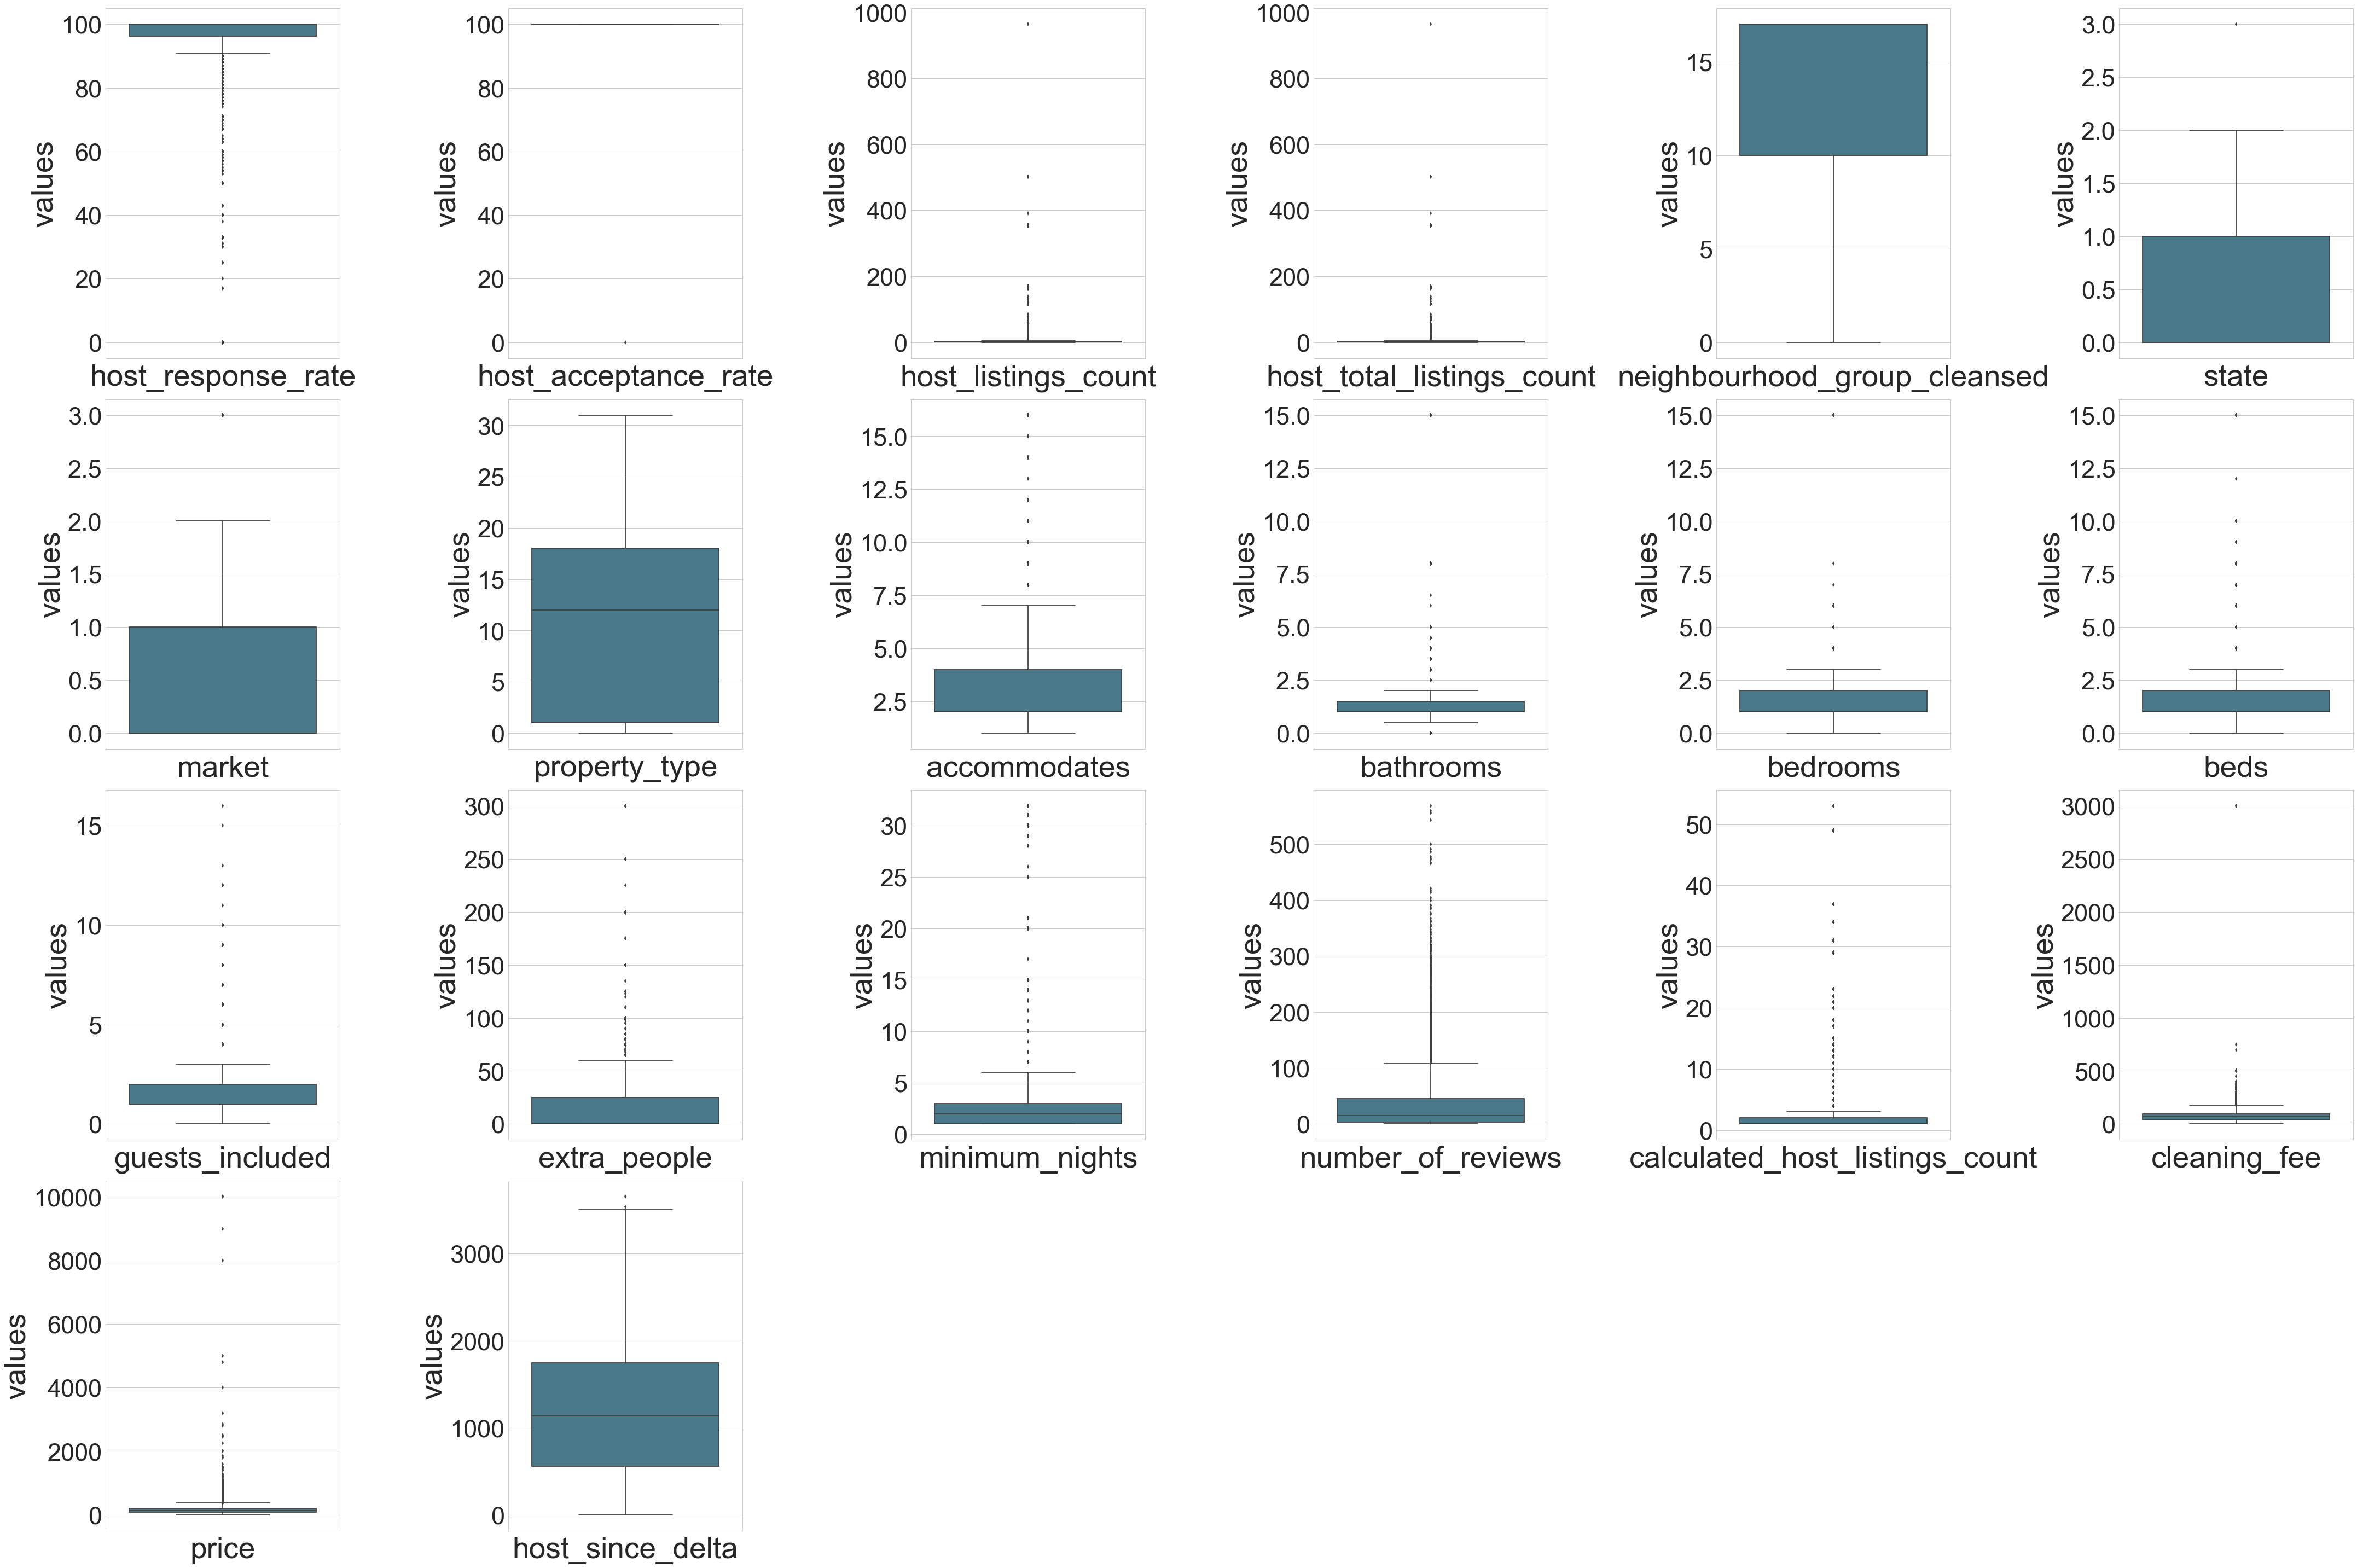

total # fixed columns: 20


In [42]:
plot_boxplot_in_sub_plot(df_selected_cols[cols], n_cols = 6, label_font_size = 55, tick_font_size = 45)

report_fixed_columns(len(cols))

In [43]:
# define function for plotting countplot in each subplot
def plot_countplot_in_sub_plot(df, n_cols = 5, label_font_size = 28, tick_font_size = 25):
    n_total_columns = len(df.columns)
    fig, axes = get_sub_plots(n_total_columns, n_cols)
        
    for i, col in enumerate(df):
        sns.countplot(x = col, data = df, ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
            
    fig.tight_layout()    
    plt.show()

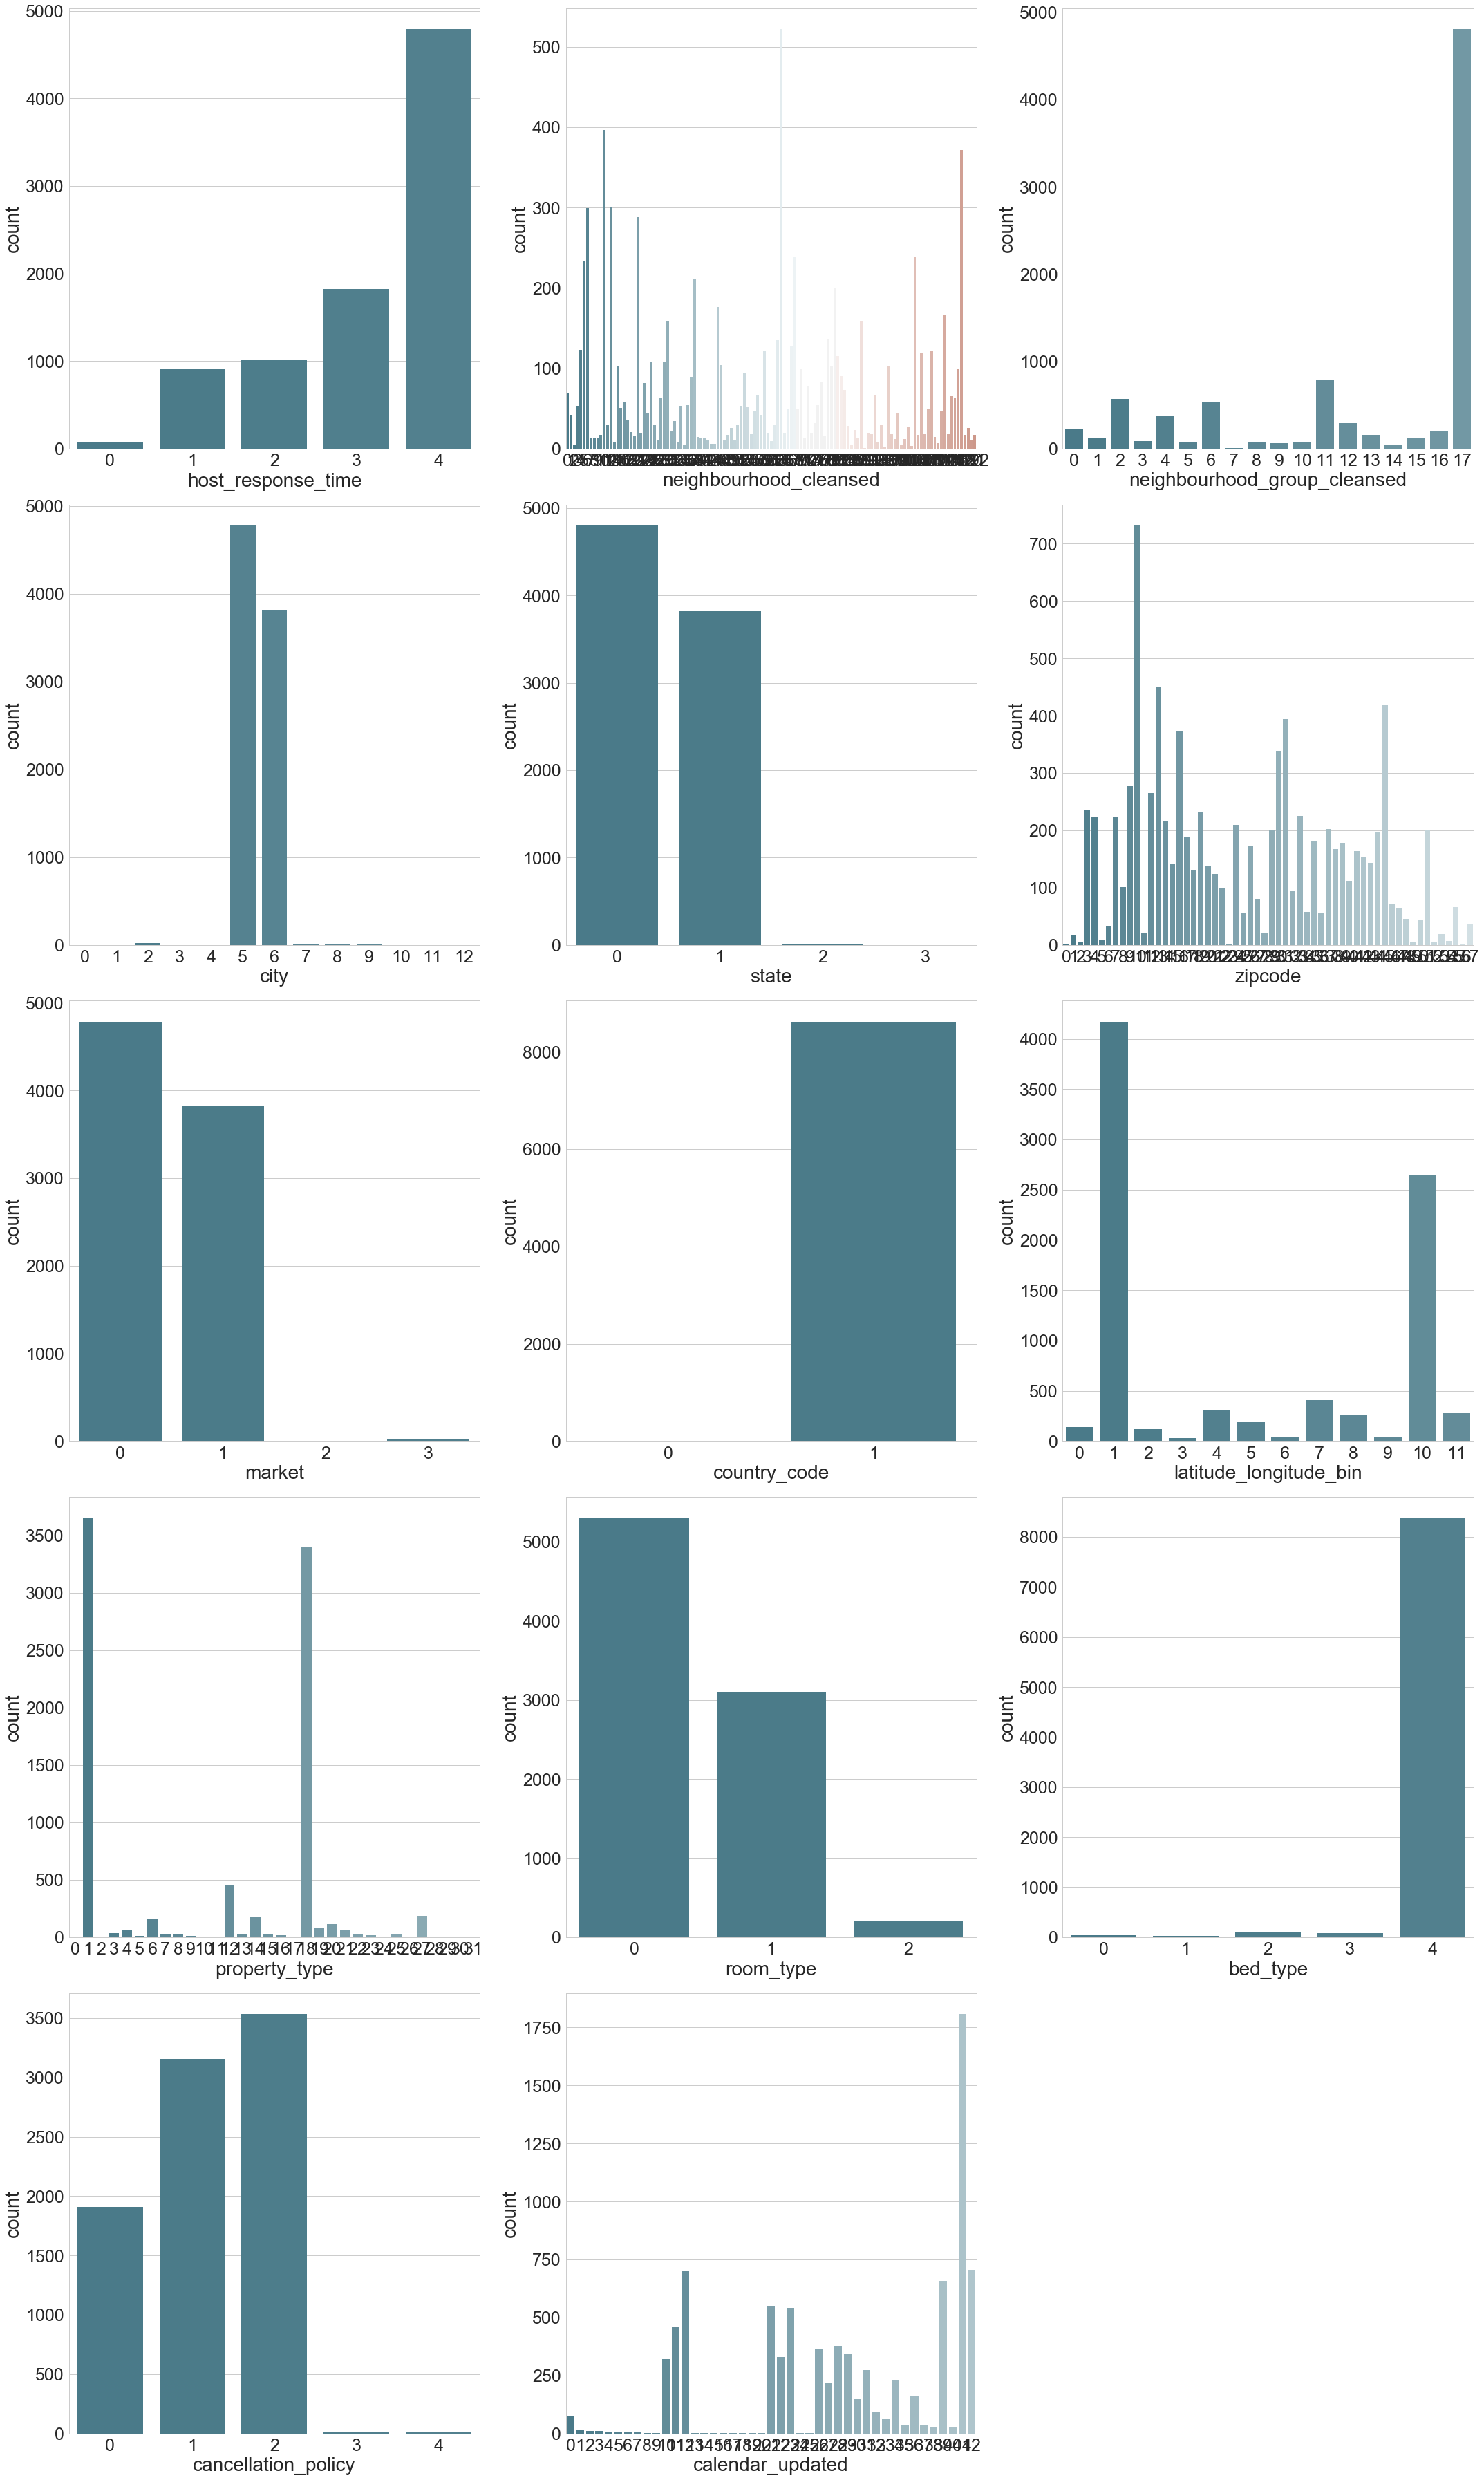

total # fixed columns: 34


In [44]:
# Plot bar chart for category data
plot_countplot_in_sub_plot(df_selected_cols[columns_categorical], n_cols = 3)

report_fixed_columns(len(columns_categorical))

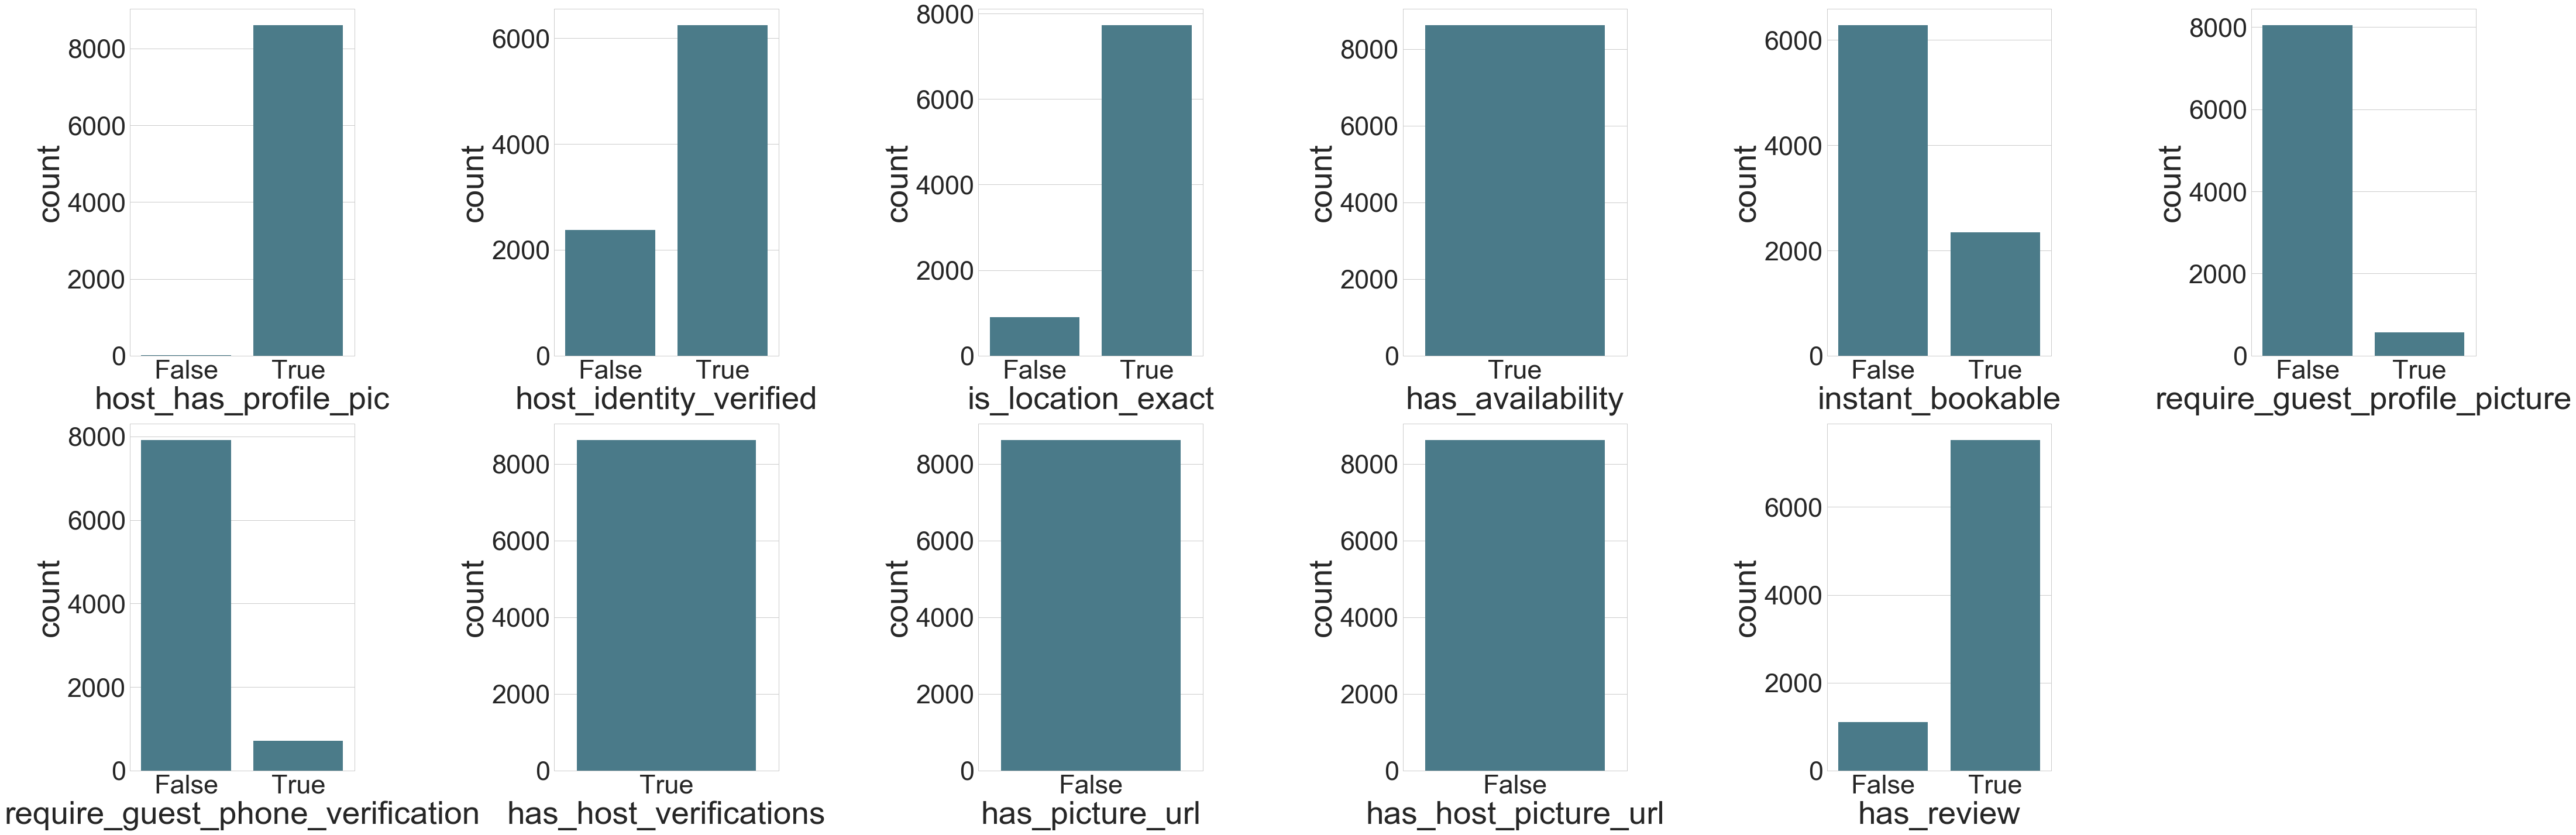

total # fixed columns: 45


In [45]:
# Plot bar chart for boolean data
plot_countplot_in_sub_plot(df_selected_cols.select_dtypes(include=[bool]), n_cols = 6,
                           label_font_size = 55, tick_font_size = 45)

report_fixed_columns(len(df_selected_cols.select_dtypes(include=[bool]).columns))

## Drop more columns
Drop more columns as we have 145462 data points but 49 columns for now

In [46]:
# Inspect current columns
print(len(df_selected_cols.columns))
print(df_selected_cols.columns)

41
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'country_code', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights',
       'calendar_updated', 'has_availability', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'cleaning_fee', 'price',
       'latitude_longitude_bin', 'host_since_delta', 'has_host_verifications',
       'has_picture_url', 'has_host_picture_url', 'has_review'],
      dtype='object')


In [47]:
# Drop some columns as we already have some plots and they do not seem needed
df_selected_cols = df_selected_cols.drop(['host_response_rate', 'host_acceptance_rate',
                                          'host_listings_count', 'host_total_listings_count',
                                          'host_since_delta', 'has_availability',
                                          'has_host_verifications', 'has_picture_url',
                                          'has_host_picture_url', 'has_review'], axis=1)

In [48]:
print(len(df_selected_cols.columns))
print(df_selected_cols.columns)

31
Index(['host_response_time', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'country_code', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'guests_included', 'extra_people', 'minimum_nights',
       'calendar_updated', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'cleaning_fee', 'price', 'latitude_longitude_bin'],
      dtype='object')


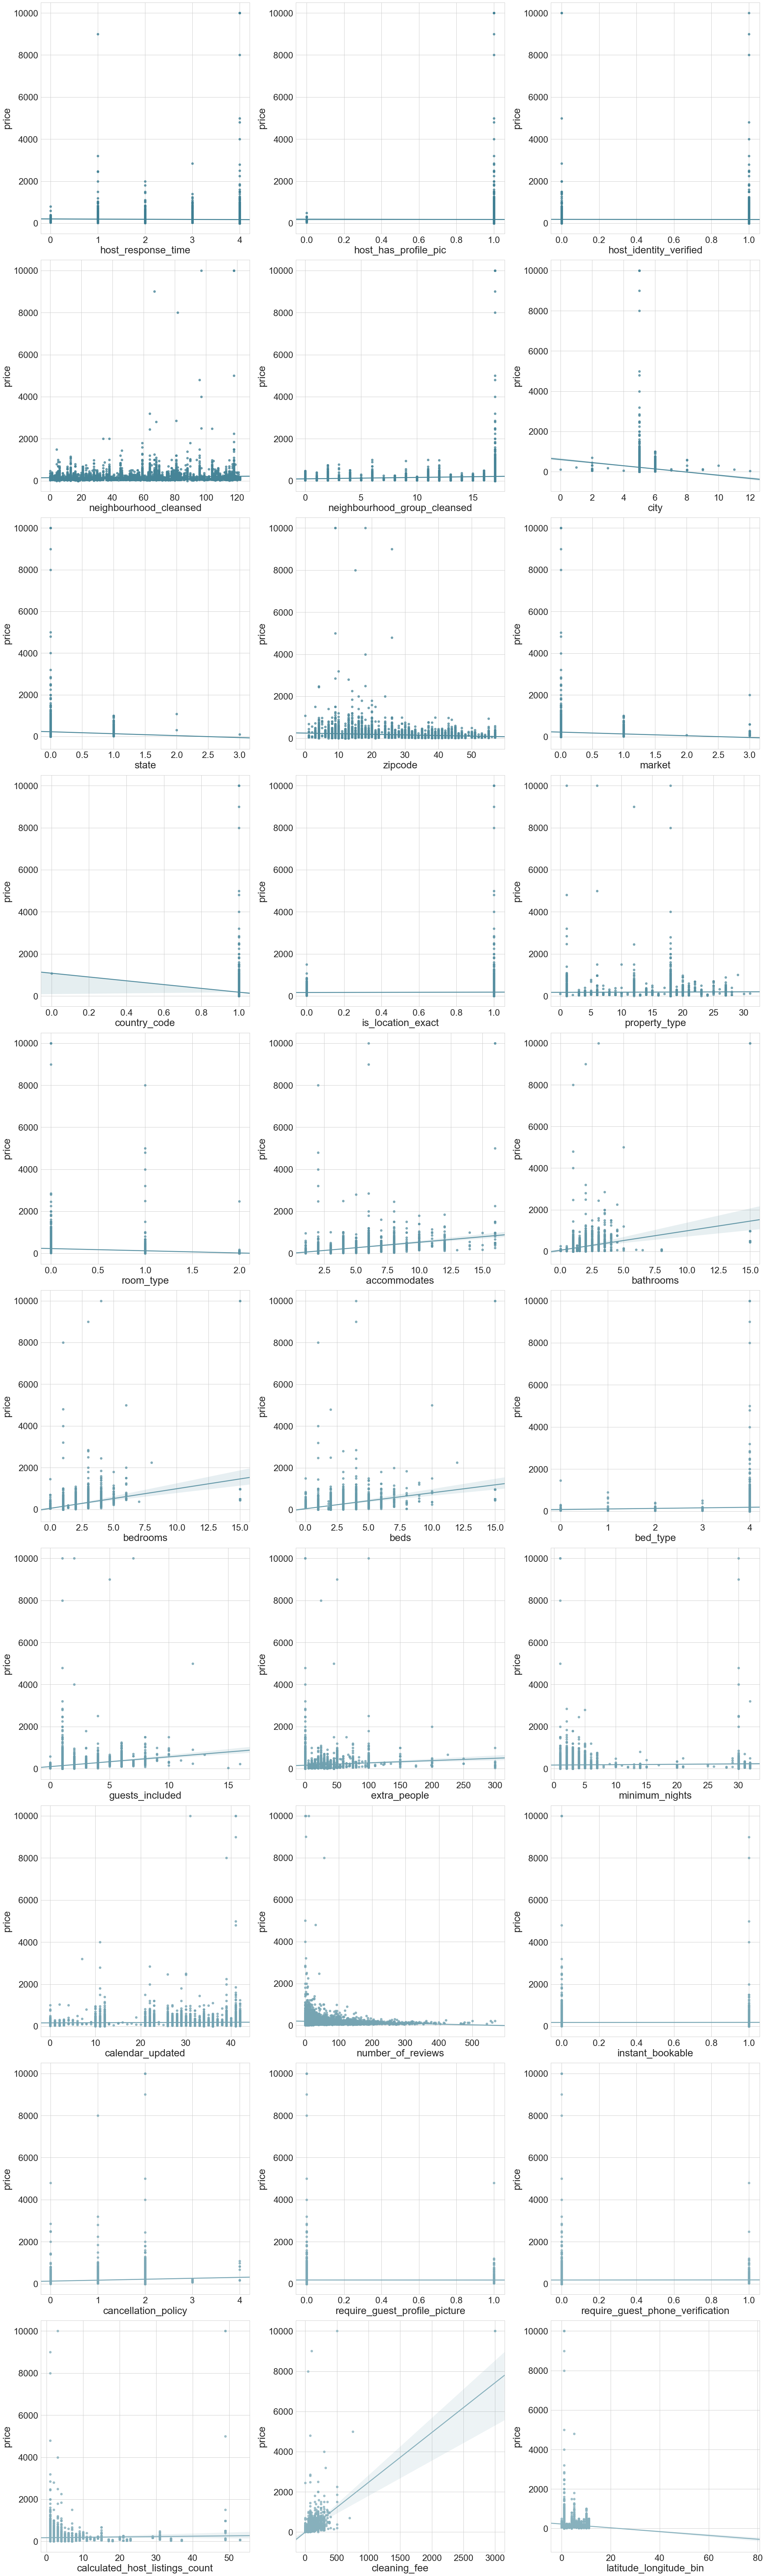

In [49]:
# Plot scatter plot of columns vs. price again to drop unnecessary columns
cols_wo_price = df_selected_cols.columns.values.tolist()
cols_wo_price.remove('price')

plot_scatter_in_sub_plot(df_selected_cols[cols_wo_price], df_selected_cols['price'], n_cols = 3)

In [50]:
# Drop more columns
dropped_cols = ['host_response_time', 'host_has_profile_pic', 'host_identity_verified',
                'neighbourhood_cleansed', 'is_location_exact',
                'extra_people', 'minimum_nights', 'calendar_updated',
                'number_of_reviews', 'instant_bookable',
                'require_guest_profile_picture',
                'require_guest_phone_verification', 'calculated_host_listings_count']

df_selected_cols = df_selected_cols.drop(dropped_cols, axis=1)

In [51]:
# Make sure that we have reasonable number of columns
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 3817
Data columns (total 18 columns):
neighbourhood_group_cleansed    8622 non-null int64
city                            8622 non-null int64
state                           8622 non-null int64
zipcode                         8622 non-null int64
market                          8622 non-null int64
country_code                    8622 non-null int64
property_type                   8622 non-null int64
room_type                       8622 non-null int64
accommodates                    8622 non-null int64
bathrooms                       8622 non-null float64
bedrooms                        8622 non-null float64
beds                            8622 non-null float64
bed_type                        8622 non-null int64
guests_included                 8622 non-null int64
cancellation_policy             8622 non-null int64
cleaning_fee                    8622 non-null float64
price                           8622 non-null float64

In [52]:
df_selected_cols.describe()

,neighbourhood_group_cleansed,city,state,zipcode,market,country_code,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,12.785317,5.440501,0.443517,24.961842,0.449316,0.999884,10.190095,0.409418,3.393760,1.325993,1.391481,1.826582,3.942009,1.767803,1.193923,76.923682,180.596033,4.833565
std,5.702557,0.543756,0.497994,14.179171,0.510117,0.010770,8.490061,0.539449,2.133906,1.022305,1.216527,1.409815,0.381847,1.383245,0.779758,71.718952,290.412272,4.200769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,5.000000,0.000000,13.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,40.000000,87.000000,1.000000
50%,17.000000,5.000000,0.000000,24.000000,0.000000,1.000000,12.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,75.000000,126.000000,2.000000
75%,17.000000,6.000000,1.000000,37.000000,1.000000,1.000000,18.000000,1.000000,4.000000,1.500000,2.000000,2.000000,4.000000,2.000000,2.000000,95.000000,200.000000,10.000000
max,17.000000,12.000000,3.000000,57.000000,3.000000,1.000000,31.000000,2.000000,16.000000,15.000000,15.000000,15.000000,4.000000,16.000000,4.000000,3000.000000,10000.000000,11.000000


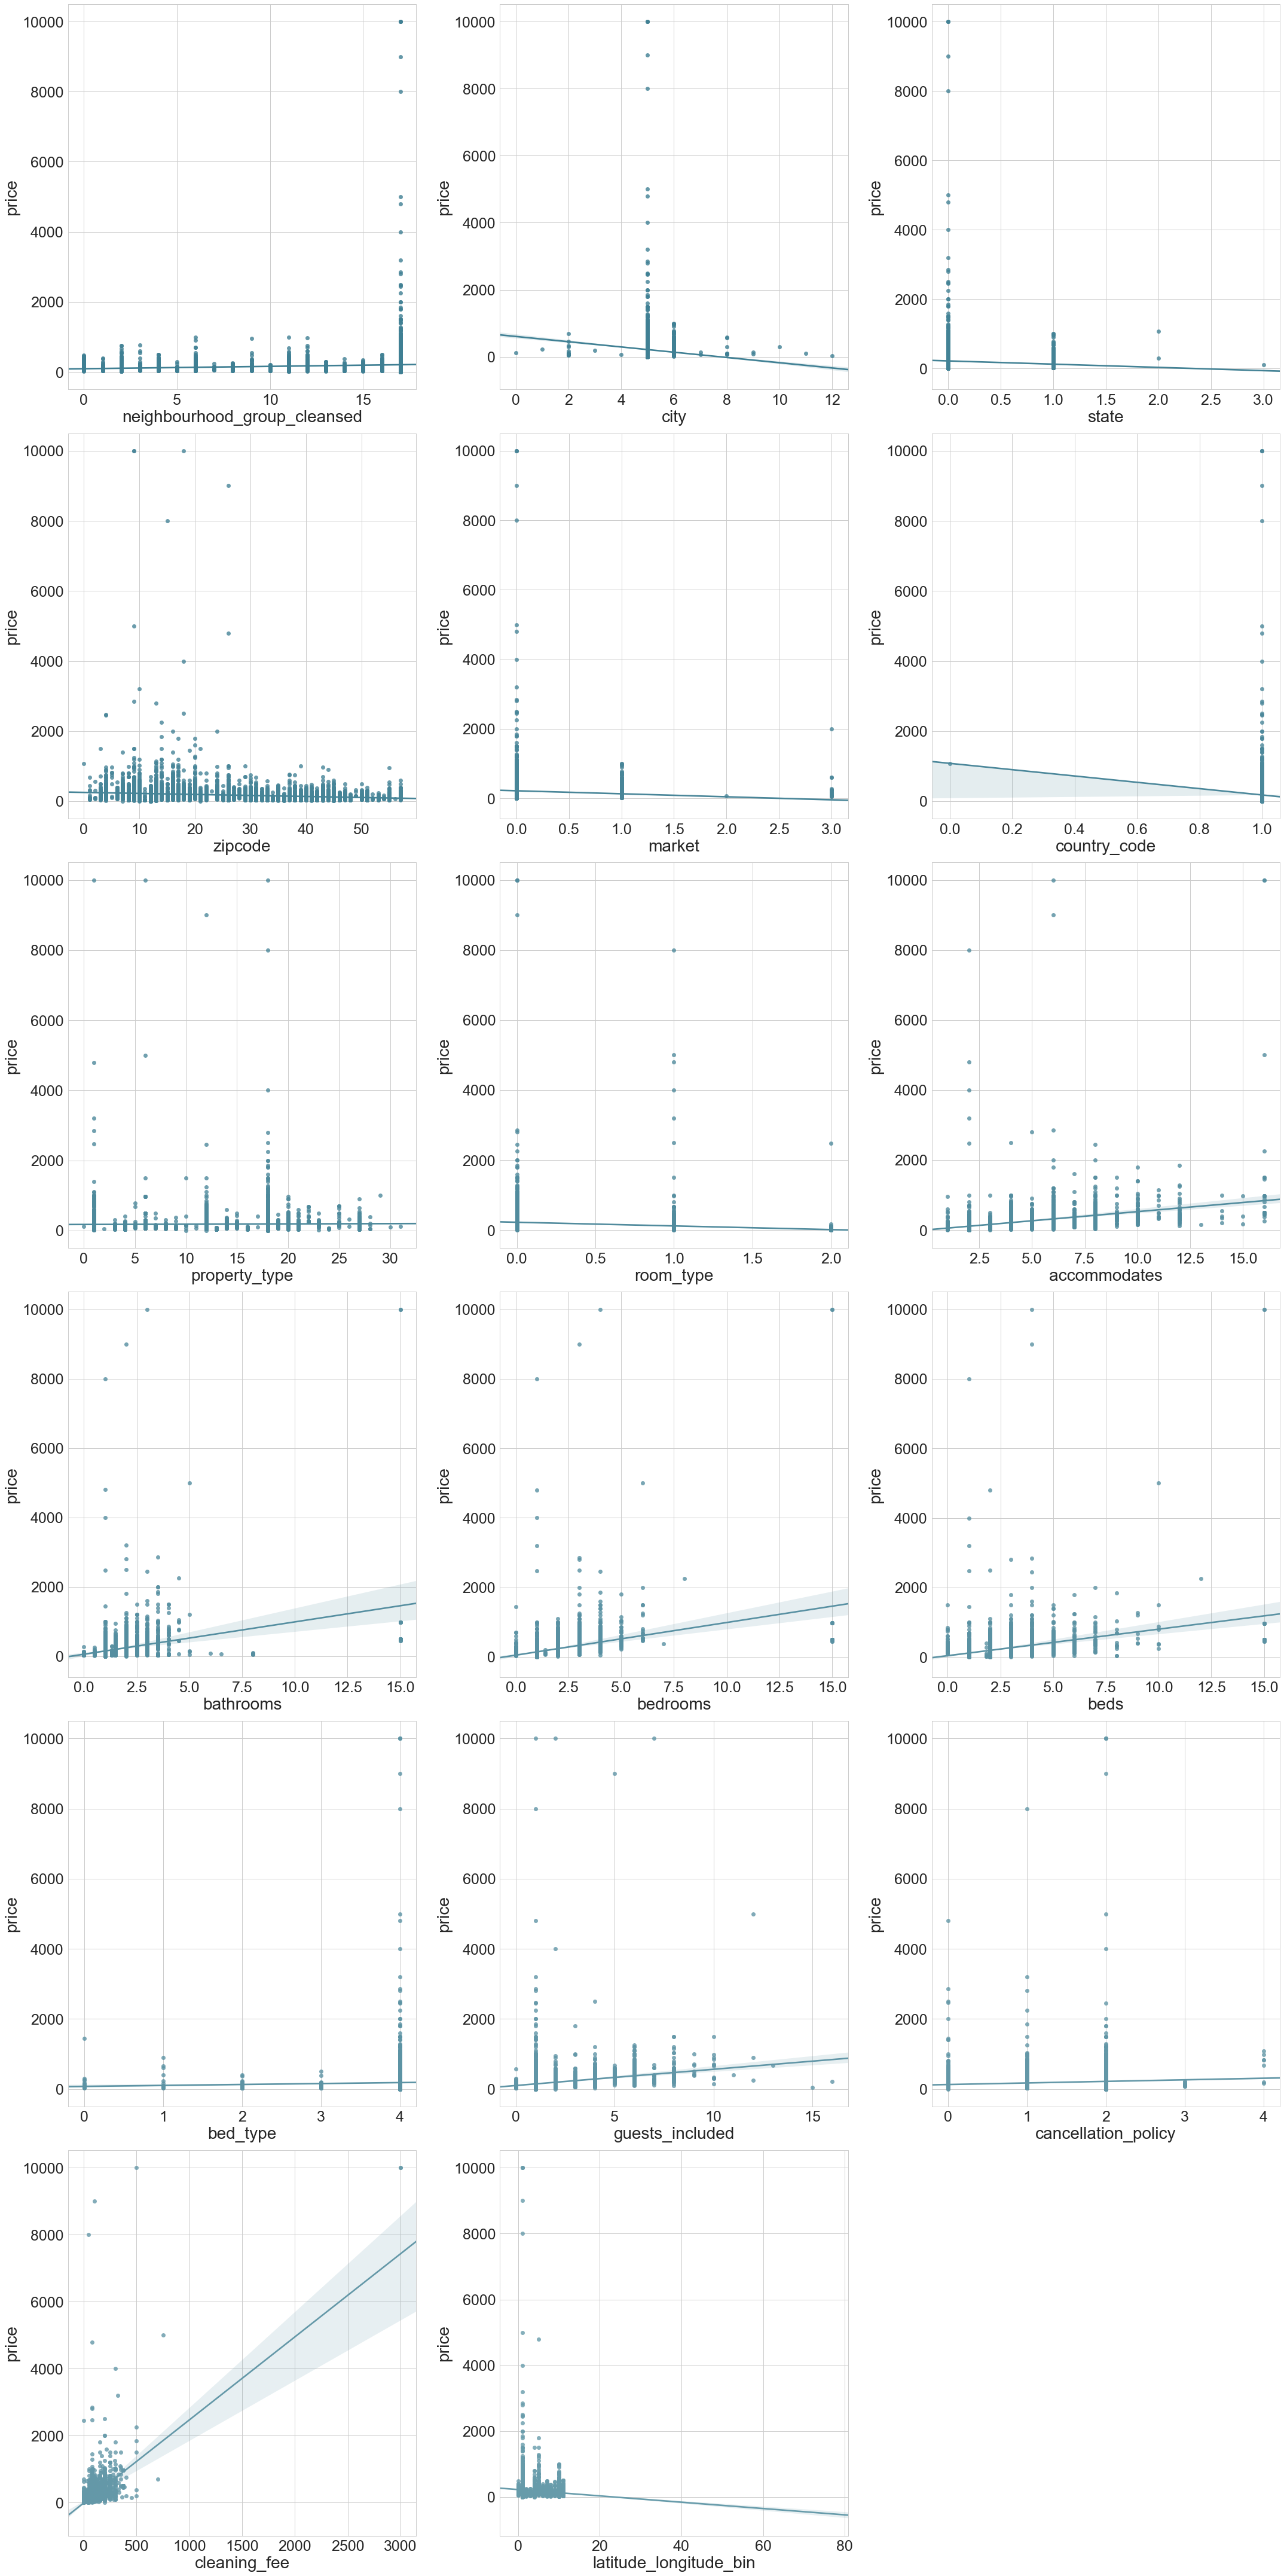

In [53]:
cols_wo_price = df_selected_cols.columns.values.tolist()
cols_wo_price.remove('price')

plot_scatter_in_sub_plot(df_selected_cols[cols_wo_price], df_selected_cols['price'])